In [13]:
import pandas as pd
import numpy as np
import os
import pickle
# 주피터 셀 실행 단계에서 다양한 이유로 경고(warning)문이 발생하는데, 셀 싱행에는 영향을 미치지 않으므로 경고문구가 생기지 않도록 설정.
import warnings
warnings.filterwarnings(action = 'ignore')

import os
import random
import math
from tqdm import tqdm

import numpy as np
import pandas as pd

import pickle

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  

In [1]:
# 최종 데이터 불러오기 
solar_data = pd.read_csv('F:/2.프로젝트/[BMT] 수요 맞춤형AI/[태양광 발전량] 데이터/solar_hour_2025-06-04.csv')
weather_data = pd.read_csv('F:/2.프로젝트/[BMT] 수요 맞춤형AI/[태양광 발전량] 데이터/부산기상데이터.csv',encoding='cp949')

NameError: name 'pd' is not defined

In [64]:
weather_data

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,159,부산,2024-01-23 1:00,-5.4,NaN,NaN,NaN,4.2,NaN,270.0,...,NaN,5000.0,NaN,NaN,0.3,NaN,2.6,4.3,6.0,7.4
1,159,부산,2024-01-23 2:00,-5.8,NaN,NaN,NaN,3.4,NaN,270.0,...,NaN,5000.0,NaN,NaN,0.1,NaN,2.3,4.1,5.9,7.3
2,159,부산,2024-01-23 3:00,-6.1,NaN,NaN,NaN,4.7,NaN,270.0,...,NaN,5000.0,NaN,NaN,-0.4,NaN,2.1,3.9,5.7,7.2
3,159,부산,2024-01-23 4:00,-6.5,NaN,NaN,NaN,4.4,NaN,250.0,...,NaN,5000.0,NaN,NaN,-0.6,NaN,1.9,3.7,5.6,7.1
4,159,부산,2024-01-23 5:00,-6.8,NaN,NaN,NaN,3.2,NaN,250.0,...,NaN,5000.0,NaN,NaN,-0.7,NaN,1.7,3.5,5.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,159,부산,2025-06-09 20:00,20.2,NaN,NaN,NaN,2.0,NaN,70.0,...,NaN,1946.0,NaN,NaN,20.5,NaN,24.7,23.8,22.1,21.1
12092,159,부산,2025-06-09 21:00,19.9,NaN,NaN,NaN,2.4,NaN,90.0,...,5.0,2231.0,NaN,NaN,19.3,NaN,23.9,23.1,22.0,21.2
12093,159,부산,2025-06-09 22:00,19.8,NaN,NaN,NaN,2.0,NaN,70.0,...,3.0,1862.0,NaN,NaN,19.0,NaN,23.3,22.5,21.8,21.1
12094,159,부산,2025-06-09 23:00,19.9,NaN,NaN,NaN,1.7,NaN,110.0,...,2.0,1449.0,NaN,NaN,20.9,NaN,23.0,22.1,21.5,21.2


In [63]:
solar_data

,id,ymdhms,YEAR,MONTH,DAY,PV_Volt,PV_Ampe,Volt_R,Volt_S,Volt_T,Ampe_R,Ampe_S,Ampe_T,Frequency,Today_Generate,Accumulated_Generation,generate_gap
0,1,2024-01-23 11:00:00,2024,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,579100.000,0.0
1,1,2024-01-23 12:00:00,2024,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,579590.000,57.0
2,1,2024-01-23 13:00:00,2024,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,580160.000,55.0
3,1,2024-01-23 14:00:00,2024,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,580700.000,48.0
4,1,2024-01-23 15:00:00,2024,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,581140.000,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,18,2025-06-04 04:00:00,2025,6,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,156.252,0.0
194664,18,2025-06-04 05:00:00,2025,6,4,566.167,1.667,395.083,387.417,392.750,4.000,4.167,4.500,59.933,0.0,156.252,0.0
194665,18,2025-06-04 06:00:00,2025,6,4,601.333,20.583,394.000,386.750,392.000,19.167,19.917,19.917,59.950,11.0,156.263,11.0
194666,18,2025-06-04 07:00:00,2025,6,4,585.500,51.917,392.750,386.583,391.750,44.250,44.750,44.083,59.958,40.0,156.292,29.0


In [39]:
# 왜도, box plot 그리는 함수 
def box_kde_plot(data, colum):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))  # 1행 2열, 가로 크기 조절

    # 2. KDE (Kernel Density Estimate)
    sns.kdeplot(data[colum], shade=True, color='purple',ax = axes[0])
    axes[0].set_title("Kernel Density Estimation (KDE)")

    # 3. Boxplot
    sns.boxplot(data[colum], color='orange',ax = axes[1])
    axes[1].set_title("Boxplot of Data")

In [40]:
# IQR 이상치 제거 
def IQR_drop(data, value):
    # IQR 계산
    Q1 = data[value].quantile(0.25)  # 1사분위수
    Q3 = data[value].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1                      # IQR

    # 이상치 기준 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 제거
    filtered_data = data[(data[value] >= lower_bound) & (data[value] <= upper_bound)]
    return filtered_data , lower_bound, upper_bound

def IQR_Clipping(df,value):
    # 평균과 표준편차 계산
    mean = df[value].mean()
    std = df[value].std()

    # 3σ 범위 설정
    lower_bound = mean - (3 * std)
    upper_bound = mean + (3 * std)

    # 이상치 제거 (Clipping)
    clipp_data = df[value].clip(lower_bound, upper_bound)

    return clipp_data

In [75]:
weather = weather_data.loc[(weather_data['일시'] >= '2024-01-23 11:00')&(weather_data['일시'] <= '2025-06-04 08:00')].reset_index(drop=True)

In [78]:
weather_data

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,159,부산,2024-01-23 1:00,-5.4,NaN,NaN,NaN,4.2,NaN,270.0,...,NaN,5000.0,NaN,NaN,0.3,NaN,2.6,4.3,6.0,7.4
1,159,부산,2024-01-23 2:00,-5.8,NaN,NaN,NaN,3.4,NaN,270.0,...,NaN,5000.0,NaN,NaN,0.1,NaN,2.3,4.1,5.9,7.3
2,159,부산,2024-01-23 3:00,-6.1,NaN,NaN,NaN,4.7,NaN,270.0,...,NaN,5000.0,NaN,NaN,-0.4,NaN,2.1,3.9,5.7,7.2
3,159,부산,2024-01-23 4:00,-6.5,NaN,NaN,NaN,4.4,NaN,250.0,...,NaN,5000.0,NaN,NaN,-0.6,NaN,1.9,3.7,5.6,7.1
4,159,부산,2024-01-23 5:00,-6.8,NaN,NaN,NaN,3.2,NaN,250.0,...,NaN,5000.0,NaN,NaN,-0.7,NaN,1.7,3.5,5.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,159,부산,2025-06-09 20:00,20.2,NaN,NaN,NaN,2.0,NaN,70.0,...,NaN,1946.0,NaN,NaN,20.5,NaN,24.7,23.8,22.1,21.1
12092,159,부산,2025-06-09 21:00,19.9,NaN,NaN,NaN,2.4,NaN,90.0,...,5.0,2231.0,NaN,NaN,19.3,NaN,23.9,23.1,22.0,21.2
12093,159,부산,2025-06-09 22:00,19.8,NaN,NaN,NaN,2.0,NaN,70.0,...,3.0,1862.0,NaN,NaN,19.0,NaN,23.3,22.5,21.8,21.1
12094,159,부산,2025-06-09 23:00,19.9,NaN,NaN,NaN,1.7,NaN,110.0,...,2.0,1449.0,NaN,NaN,20.9,NaN,23.0,22.1,21.5,21.2


In [81]:
def data_eda(solar_data, weather_data, id ):
    raw_data = solar_data.loc[solar_data['id']==id] 
    raw_data = raw_data.dropna().reset_index(drop=True) # 결측 데이터 삭제 
    raw_data['ymdhms'] = pd.to_datetime(raw_data['ymdhms'])
    
    w_data = weather_data[['일시','기온(°C)','일사(MJ/m2)','일조(hr)']]
    w_data.fillna(0, inplace=True)
    w_data['일시'] = pd.to_datetime(w_data['일시'])
    weather = w_data.loc[(w_data['일시'] >= '2024-01-23 11:00')&(w_data['일시'] <= '2025-06-04 08:00')].reset_index(drop=True)
    weather.columns = ['ymdhms', '기온(°C)','일사(MJ/m2)','일조(hr)']
    weather['ymdhms'] = pd.to_datetime(weather['ymdhms'])

    
    # 부산 날씨 데이터 날짜(시간) 기준으로 결합
    merged_df = pd.merge(raw_data, weather, on='ymdhms', how='left')    
    df = merged_df.copy()
    
    df['Hour'] = df.ymdhms.dt.hour

    
    # 데이터 전처리 
    #### generate_gap ####
    # 0이 연속적으로 유지되는 구간 탐지
    threshold = 30  # 연속으로 유지되는 최소 횟수
    is_zero = df['generate_gap'] == 0 
    zero_group = is_zero.astype(int).groupby(is_zero.ne(is_zero.shift()).cumsum()).cumsum() 
    long_zero_indices = df.index[zero_group >= threshold]
    df = df.drop(long_zero_indices,axis=0).reset_index(drop=True)
    
    # 00:00:00시의 generate_gap을 0으로 변환 
    df.loc[df.Hour == 0 , 'generate_gap'] = 0
    df = df.drop(df.loc[df['generate_gap'] <= 0].index).reset_index(drop=True)
    
    # 이상치 제거 및 결측값 대체 
    df, l , u = IQR_drop(df, 'generate_gap')
    df_filled = df.fillna(method='bfill')

    return df_filled, l , u 


ID별 데이터 불러오기

In [82]:
# 데이터를 저장할 딕셔너리
dataframes = {}
iqr_df = pd.DataFrame(columns=['lower','upper'],index=range(1,19))
# for문을 이용해 CSV 파일을 읽어 각각 다른 이름으로 저장
for i in range(1,19):
    df_name = f"data_{i}"  # 변수 이름 자동 생성 (df_1, df_2, df_3)
    lower = f"lower_{i}"
    upper = f"upper_{i}"
    dataframes[df_name],iqr_df['lower'][i],iqr_df['upper'][i]= data_eda(solar_data, weather_data, i)
    print(len(dataframes[df_name]))

5031
5058
5046
5044
5062
5046
4986
5041
4980
4939
5029
4792
4721
4652
4668
4731
4727
4694


분석

In [83]:
df = dataframes['data_1']

In [84]:
df

,id,ymdhms,YEAR,MONTH,DAY,PV_Volt,PV_Ampe,Volt_R,Volt_S,Volt_T,...,Ampe_S,Ampe_T,Frequency,Today_Generate,Accumulated_Generation,generate_gap,기온(°C),일사(MJ/m2),일조(hr),Hour
0,1,2024-02-21 08:00:00,2024,2,21,535.000,2.000,378.333,375.417,380.750,...,6.833,6.500,59.933,1.0,64.938,1.0,7.0,0.01,0.0,8
1,1,2024-02-21 09:00:00,2024,2,21,596.692,9.692,381.154,378.769,383.538,...,11.538,11.308,59.992,6.0,64.943,5.0,6.7,0.04,0.0,9
2,1,2024-02-21 10:00:00,2024,2,21,610.154,15.077,381.462,378.462,383.692,...,15.846,15.769,59.977,16.0,64.953,10.0,7.0,0.19,0.0,10
3,1,2024-02-21 11:00:00,2024,2,21,601.333,12.500,382.333,379.917,385.083,...,14.083,13.417,59.967,23.0,64.960,7.0,7.5,0.58,0.0,11
4,1,2024-02-21 12:00:00,2024,2,21,603.417,13.167,384.917,382.917,387.917,...,14.583,13.833,59.950,31.0,64.968,8.0,7.7,0.40,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,2025-06-03 18:00:00,2025,6,3,561.167,10.417,389.667,386.667,392.000,...,12.917,12.667,59.975,459.0,229.799,7.0,21.3,1.10,1.0,18
5034,1,2025-06-04 05:00:00,2025,6,4,568.583,2.833,396.000,392.333,398.417,...,6.083,6.250,59.967,1.0,229.800,1.0,18.0,0.00,0.0,5
5035,1,2025-06-04 06:00:00,2025,6,4,619.583,25.500,394.417,390.833,396.917,...,24.500,23.583,59.950,15.0,229.814,14.0,17.7,0.05,0.0,6
5036,1,2025-06-04 07:00:00,2025,6,4,597.917,59.250,390.750,388.333,394.167,...,51.750,50.917,59.933,49.0,229.848,34.0,18.5,0.59,0.6,7


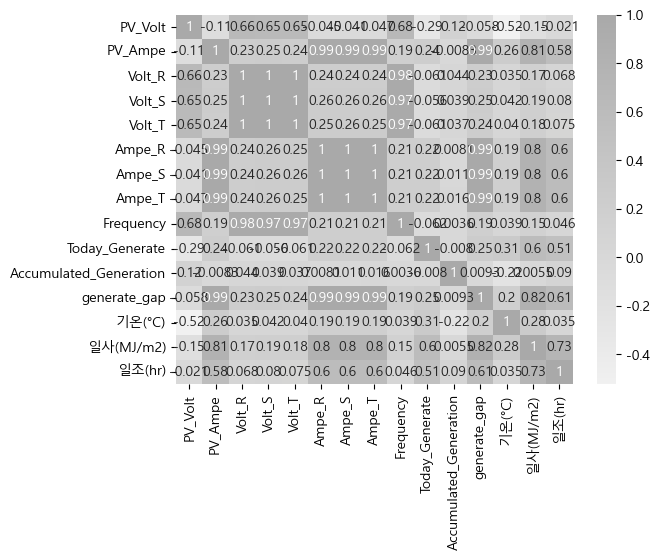

      VIF Factor                features
0   7.983675e+02                 PV_Volt
1   6.380228e+02                 PV_Ampe
2   1.262112e+06                  Volt_R
3   1.490093e+06                  Volt_S
4   1.482815e+06                  Volt_T
5   1.936577e+04                  Ampe_R
6   2.530840e+04                  Ampe_S
7   1.353310e+04                  Ampe_T
8   1.165934e+04               Frequency
9   6.365862e+00          Today_Generate
10  1.334422e+01  Accumulated_Generation
11  2.491375e+02            generate_gap
12  1.289248e+01                  기온(°C)
13  2.018212e+01               일사(MJ/m2)
14  6.918973e+00                  일조(hr)


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df[df.select_dtypes(include='float').columns].corr()  # 다중공선성 확인
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(df[df.select_dtypes(include='float').columns].corr(), annot = True, cmap = cmap)
plt.show()

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(df[df.select_dtypes(include='float').columns].values, i) 
                    for i in range(df[df.select_dtypes(include='float').columns].shape[1])]
vif['features'] = df[df.select_dtypes(include='float').columns].columns

print(vif) # 모든 변수의 vif 값이 10보다 작으므로 다중공선성 문제가 없다.

### 그래프 

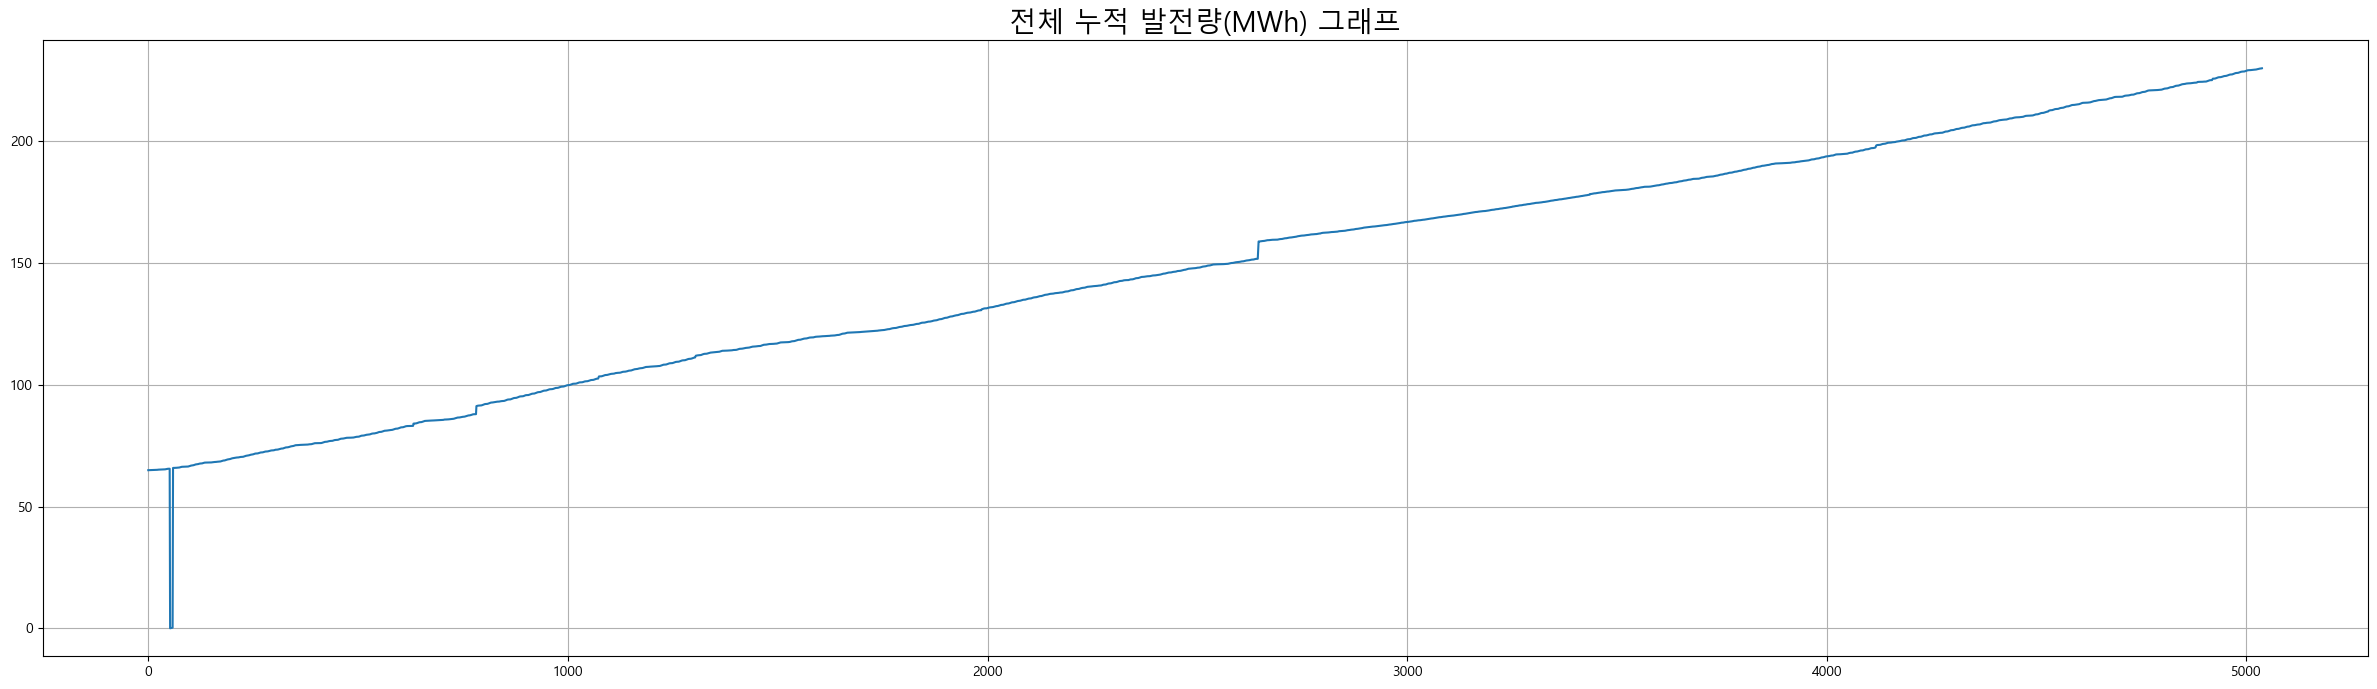

In [86]:
df['Accumulated_Generation'].plot(kind='line',figsize=(30, 8))

plt.title('전체 누적 발전량(MWh) 그래프',size=20)
plt.grid(True)

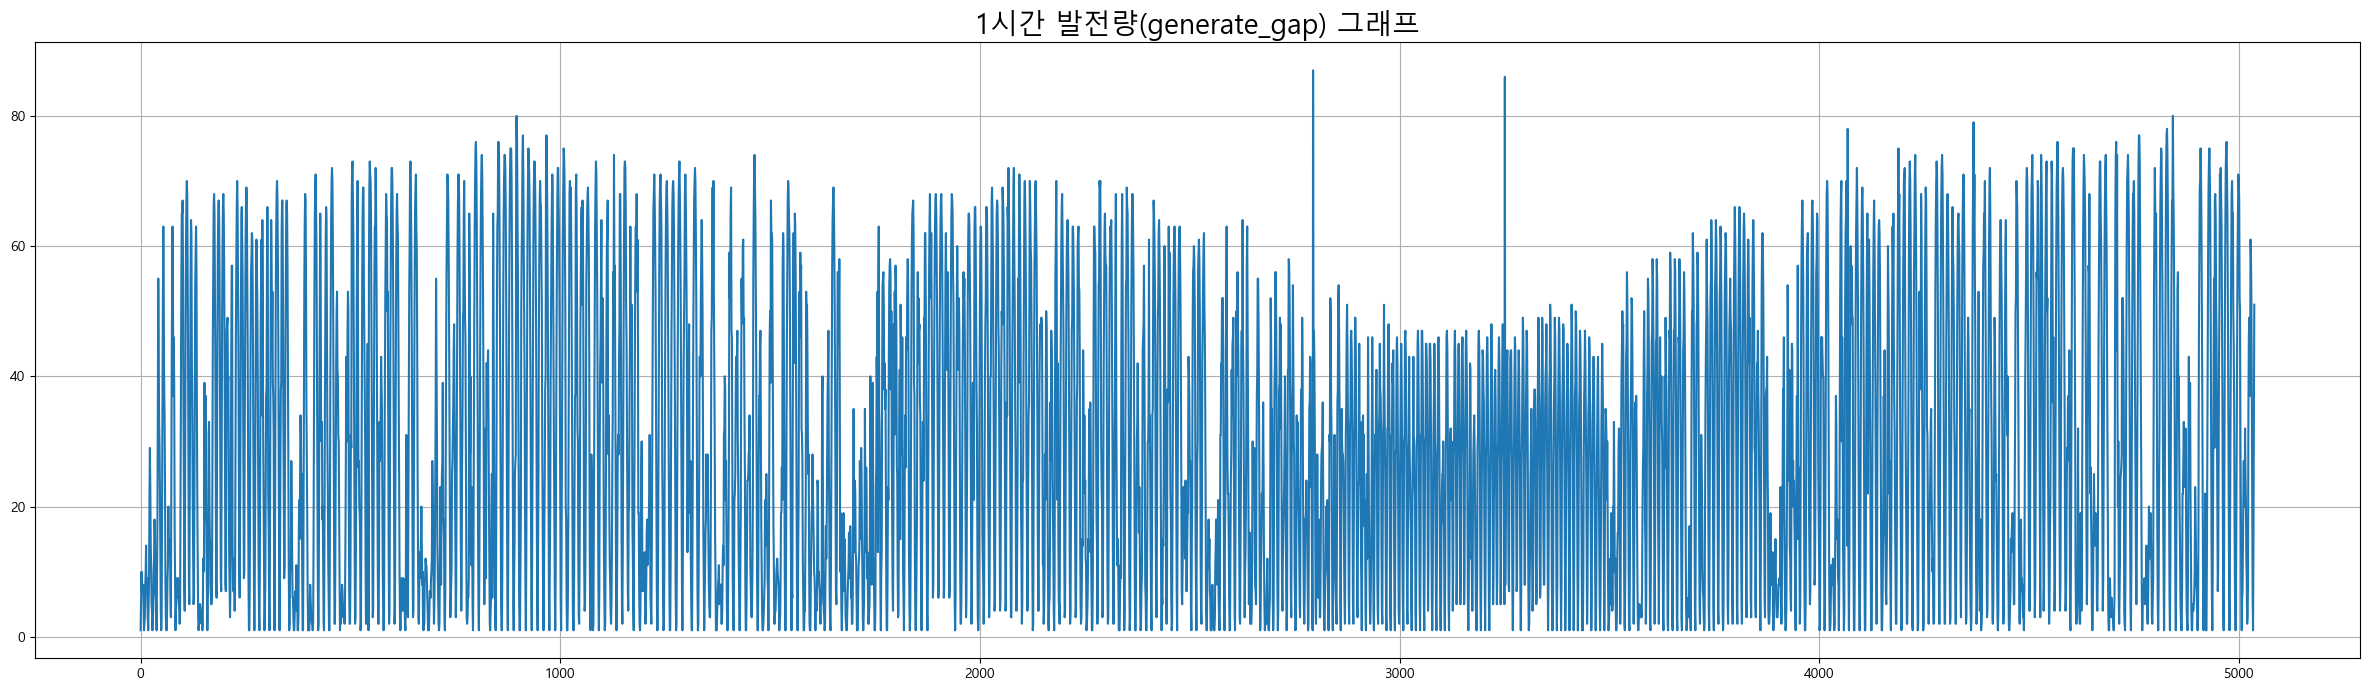

In [87]:
# 2) 그 외 generation_gap인 -값 제거 
df['generate_gap'].plot(kind='line',figsize=(30, 8))
plt.title('1시간 발전량(generate_gap) 그래프',size=20)

plt.grid(True)

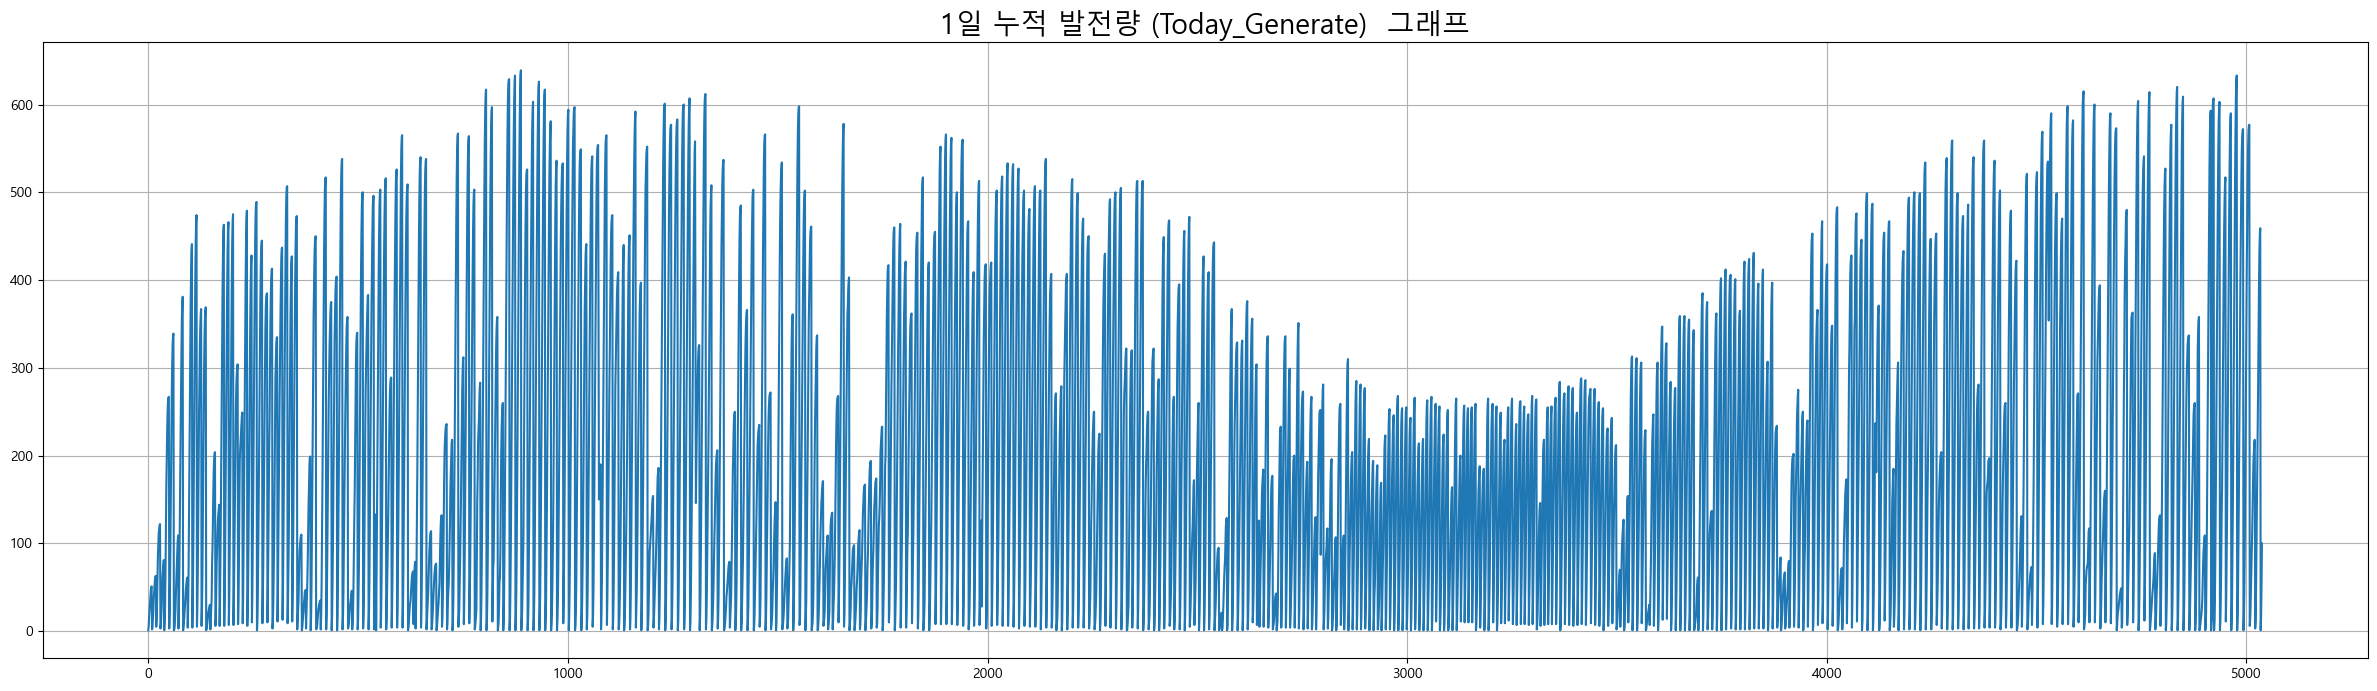

In [88]:
# 2) 그 외 generation_gap인 -값 제거 
df['Today_Generate'].plot(kind='line',figsize=(30, 8))
plt.title('1일 누적 발전량 (Today_Generate)  그래프',size=20)

plt.grid(True)

In [89]:
data_col = ['PV_Volt', 'PV_Ampe', 'Volt_R', 'Volt_S', 'Volt_T', 'Ampe_R', 'Ampe_S','Hour',
       'Ampe_T', 'Frequency', 'Today_Generate', 'Accumulated_Generation','강수량(mm)','기온(°C)','습도(%)','일조(hr)','풍속(m/s)',
       '일사(MJ/m2)', 'generate_gap']

In [90]:
# Pearson 상관관계 분석
correlation_matrix =df[['MONTH','DAY'] +data_col].corr()  # 기본값이 pearson이므로 생략 가능

# 상관분석 
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix,annot_kws={"size": 15},annot=True, cmap='coolwarm',linewidths=.5)
# 플로팅
plt.title('solar_hour 상관관계',size = 13)
plt.rcParams['axes.unicode_minus'] = False


KeyError: "['강수량(mm)', '습도(%)', '풍속(m/s)'] not in index"

### 머신러닝 모델 

Prophet

In [91]:
from prophet import Prophet
features = ['Ampe_R', 'Ampe_S','Ampe_T','일사(MJ/m2)',  '일조(hr)']
target = 'generate_gap'
model = Prophet()

Importing plotly failed. Interactive plots will not work.


In [95]:
train_data

,id,ymdhms,YEAR,MONTH,DAY,PV_Volt,PV_Ampe,Volt_R,Volt_S,Volt_T,...,Ampe_S,Ampe_T,Frequency,Today_Generate,Accumulated_Generation,generate_gap,기온(°C),일사(MJ/m2),일조(hr),Hour
0,1,2024-02-21 08:00:00,2024,2,21,535.000,2.000,378.333,375.417,380.750,...,6.833,6.500,59.933,1.0,64.938,1.0,7.0,0.01,0.0,8
1,1,2024-02-21 09:00:00,2024,2,21,596.692,9.692,381.154,378.769,383.538,...,11.538,11.308,59.992,6.0,64.943,5.0,6.7,0.04,0.0,9
2,1,2024-02-21 10:00:00,2024,2,21,610.154,15.077,381.462,378.462,383.692,...,15.846,15.769,59.977,16.0,64.953,10.0,7.0,0.19,0.0,10
3,1,2024-02-21 11:00:00,2024,2,21,601.333,12.500,382.333,379.917,385.083,...,14.083,13.417,59.967,23.0,64.960,7.0,7.5,0.58,0.0,11
4,1,2024-02-21 12:00:00,2024,2,21,603.417,13.167,384.917,382.917,387.917,...,14.583,13.833,59.950,31.0,64.968,8.0,7.7,0.40,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,1,2024-12-31 13:00:00,2024,12,31,603.750,73.667,390.083,388.000,393.833,...,65.083,64.000,59.950,196.0,173.558,44.0,8.5,2.16,1.0,13
3267,1,2024-12-31 14:00:00,2024,12,31,622.417,56.000,390.917,388.583,393.917,...,51.333,50.583,59.967,232.0,173.594,36.0,9.5,2.05,1.0,14
3268,1,2024-12-31 15:00:00,2024,12,31,637.833,31.750,391.167,388.333,393.917,...,31.417,30.917,59.967,254.0,173.616,22.0,9.4,1.69,1.0,15
3269,1,2024-12-31 16:00:00,2024,12,31,630.583,8.667,391.583,388.583,394.000,...,11.750,11.750,59.967,261.0,173.623,7.0,9.3,1.12,1.0,16


In [102]:
# #1. Train, Test Split
train_data = df[df.ymdhms < '2025-05-01 00:00:00']  # 2023년까지 Train 데이터
test_data = df[df.ymdhms >= '2025-05-01 00:00:00'] 

# 2. Train, Test 데이터 분리
X_train = train_data[features]
y_train = train_data[target].values 

X_test = test_data[features]
y_test = test_data[target].values 

#2. Create Scaler
feature_scaler = MinMaxScaler(feature_range=(0,1))
Scaled_X_train = feature_scaler.fit_transform(X_train)
Scaled_X_test = feature_scaler.transform(X_test)

target_scaler = MinMaxScaler(feature_range=(0,1))
Scaled_y_train = target_scaler.fit_transform(y_train.reshape(-1, 1))
Scaled_y_test = target_scaler.transform(y_test.reshape(-1, 1))  

model tuning

In [103]:
Train = np.hstack((Scaled_X_train, Scaled_y_train))  
Train_df = pd.DataFrame(Train,columns=features+['y'])
Train_df['ds'] = train_data['ymdhms'].values


model = Prophet(
    changepoint_prior_scale=0.5,
    seasonality_mode='additive',
    seasonality_prior_scale=30)

for fe in features[:-1]:
    model.add_regressor(fe)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(Train_df,iter=5000)

15:53:06 - cmdstanpy - INFO - Chain [1] start processing
15:53:07 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
Test_df = pd.DataFrame(Scaled_X_test, columns=features)
Test_df['ds'] = test_data.ymdhms.values
display(Test_df.head(2))

,Ampe_R,Ampe_S,Ampe_T,일사(MJ/m2),일조(hr),ds
0,0.097694,0.108198,0.103117,0.002558,0.0,2025-05-01 06:00:00
1,0.123477,0.135771,0.130106,0.071611,0.1,2025-05-01 07:00:00


In [105]:
# 예측 
forecast = model.predict(Test_df)
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(x, 0))


y_test_sc_bi = target_scaler.inverse_transform(Scaled_y_test) 
y_pred_sc_bi = target_scaler.inverse_transform(pd.DataFrame(forecast['yhat'])) 

y_pred_lower = target_scaler.inverse_transform(pd.DataFrame(forecast['yhat_lower'])) 
y_pred_upper = target_scaler.inverse_transform(pd.DataFrame(forecast['yhat_upper'])) 

,GT,Pred,ymdhms,y_lower,y_upper
0,5.0,6.220377,2025-05-01 06:00:00,2.985770,9.230195
1,10.0,8.246593,2025-05-01 07:00:00,5.050819,11.091984
2,23.0,27.936752,2025-05-01 08:00:00,24.779723,31.004314
3,29.0,26.858391,2025-05-01 09:00:00,23.658008,29.853509
4,27.0,28.264502,2025-05-01 10:00:00,25.162776,31.339083
...,...,...,...,...,...
443,7.0,6.852788,2025-06-03 18:00:00,3.640572,10.109833
444,1.0,2.108860,2025-06-04 05:00:00,-1.069169,5.124156
445,14.0,13.583414,2025-06-04 06:00:00,10.227041,16.889540
446,34.0,32.798259,2025-06-04 07:00:00,29.480938,36.243544


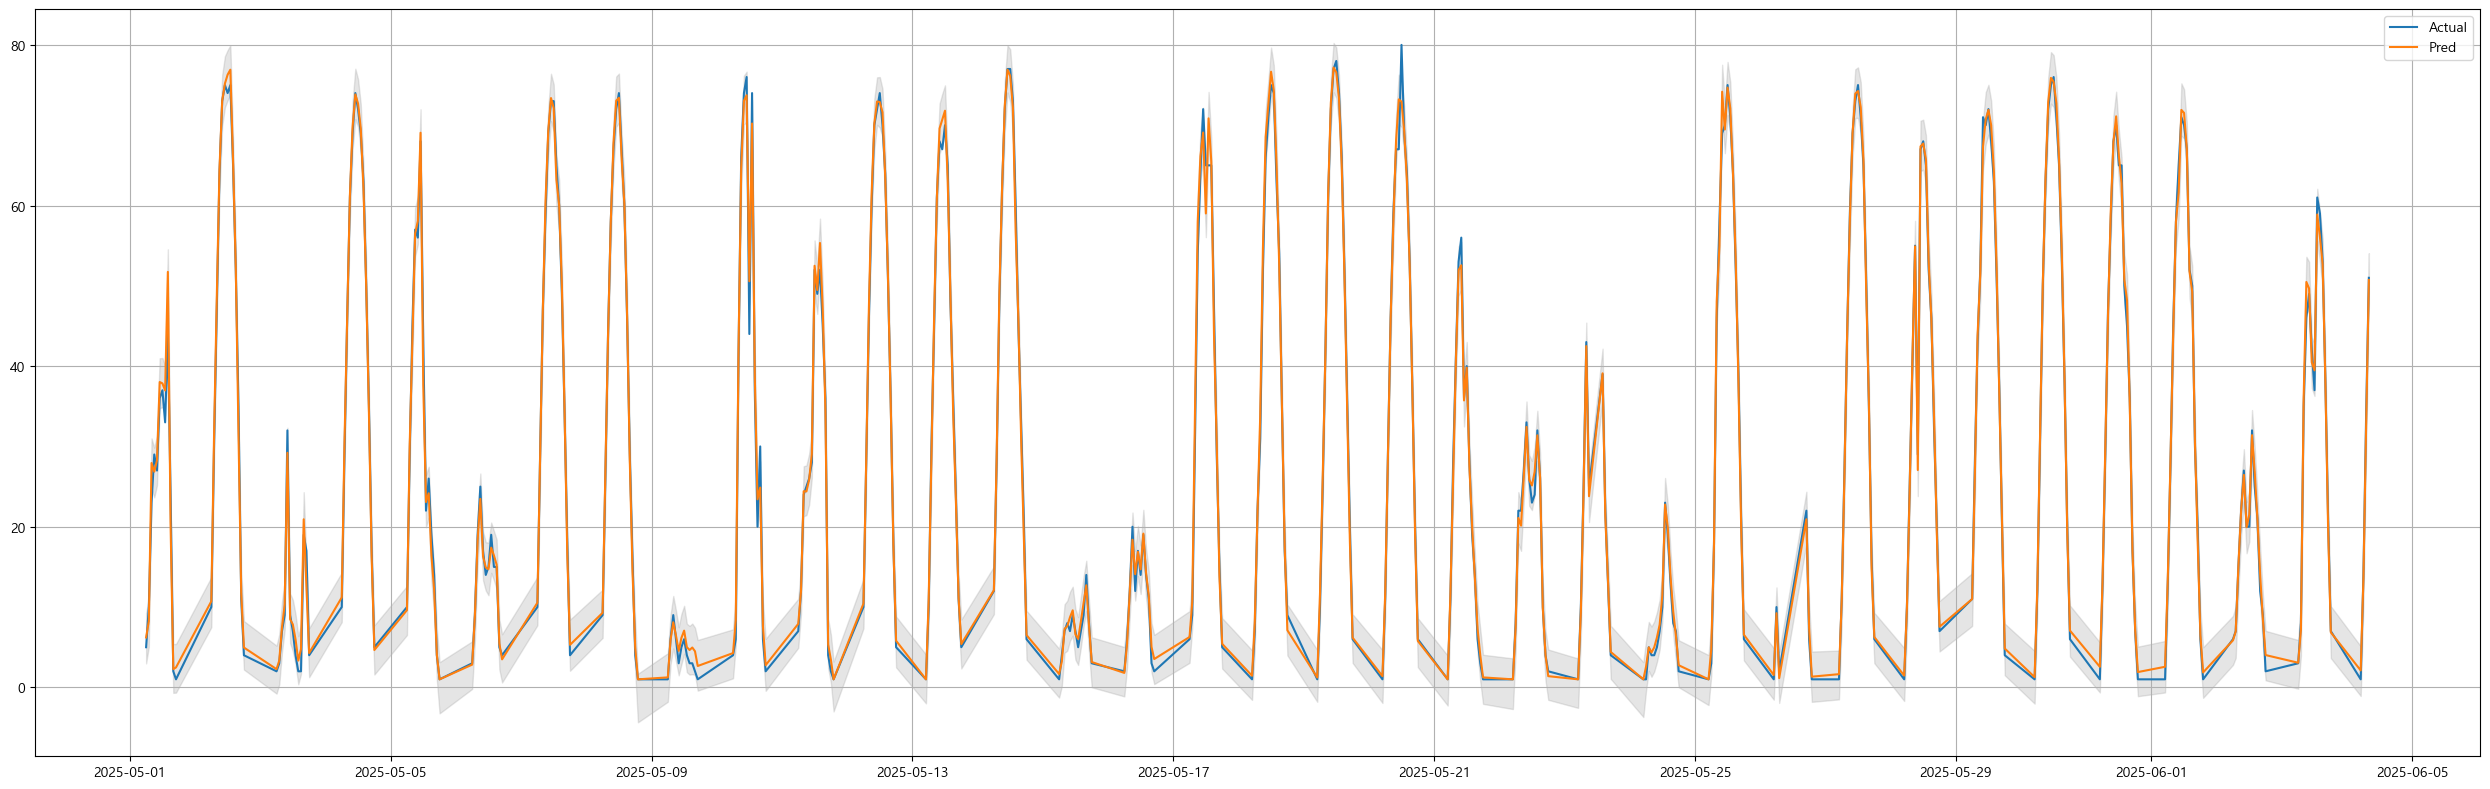

,Results
MAPE,10.575438
RMSE,1.558064
R2,0.996091


In [106]:
predict_result = pd.DataFrame(y_test_sc_bi, columns=['GT'])
predict_result['Pred'] = y_pred_sc_bi 
predict_result['ymdhms'] = Test_df['ds'] 
predict_result['y_lower'] = y_pred_lower
predict_result['y_upper'] = y_pred_upper

display(predict_result)
zero_index = predict_result.loc[predict_result['GT'] <= 0].index
value_index = predict_result.loc[predict_result['GT'] > 0].index  

result = predict_result[['ymdhms','Pred']]
result.columns = ['ymdhms','예측 발전량']
# 예측 값의 불확실성 구간을 회색 음영으로 표시

# MAPE 계산
MAPE = np.mean(np.abs((predict_result.iloc[value_index]['GT']- predict_result.iloc[value_index]['Pred']) /  predict_result.iloc[value_index]['GT'])) * 100
RMSE = np.sqrt(mean_squared_error(predict_result['Pred'], predict_result['GT']))
R2 = r2_score(predict_result['Pred'], predict_result['GT'])

# 예측 데이터 시각화 
from sklearn.metrics import  mean_squared_error, r2_score

plt.figure(figsize=(25, 8))
plt.plot(forecast['ds'],predict_result['GT'], label='Actual')
plt.plot(forecast['ds'],predict_result['Pred'], label='Pred')
plt.fill_between(forecast['ds'], predict_result['y_lower'], predict_result['y_upper'], color='gray',alpha=0.2)
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()

result = pd.DataFrame(data=[MAPE, RMSE, R2], index=['MAPE','RMSE','R2'],columns=['Results'])
display(result)

### 딥러닝 모델 (LTSF_Linear)
- LTSF_Linear모델은 시계열 데이터 예측에 적합한 모델로, 단순하고 해석이 쉽고 빠른 장점을 가지고있다. 
- 하지만 Feature별 독립적으로 예측을 하므로 , Feature간의 관계를 고려하지 않는다.
- 그러므로 Feature 간의 관계(상관성)이 중요한 문제에선 이 모델은 적합하지 않다. 
- 다변량 관계를 활용해야 하는 경우 성능이 떨어질 수 있다.

In [167]:
class LTSF_Linear(torch.nn.Module):
    def __init__(self, window_size, forcast_size, individual, feature_size):
        super(LTSF_Linear, self).__init__()
        self.window_size = window_size
        self.forcast_size = forcast_size
        self.individual = individual
        self.channels = feature_size
        if self.individual:
            self.Linear = torch.nn.ModuleList()
            for i in range(self.channels):
                self.Linear.append(torch.nn.Linear(self.window_size, self.forcast_size))
        else:
            self.Linear = torch.nn.Linear(self.window_size, self.forcast_size)

    def forward(self, x):
        if self.individual:
            output = torch.zeros([x.size(0), self.forcast_size, x.size(2)],dtype=x.dtype).to(x.device)
            for i in range(self.channels):
                output[:,:,i] = self.Linear[i](x[:,:,i])
            x = output
        else:
            x = self.Linear(x.permute(0,2,1)).permute(0,2,1)
        return x

In [ ]:
class LTSF_Linear_SingleTarget(nn.Module):
    def __init__(self, window_size, forcast_size, individual, feature_size, target_size):
        super(LTSF_Linear_SingleTarget, self).__init__()
        self.window_size = window_size
        self.forecast_size = forcast_size
        self.individual = individual
        self.input_channels = feature_size  # 입력 변수 개수 (5)
        self.output_channels = target_size  # 예측할 변수 개수 (1)

        if self.individual:
            self.Linear = nn.ModuleList()
            for _ in range(self.output_channels):
                self.Linear.append(nn.Linear(self.window_size * self.input_channels, self.forecast_size))
        else:
            self.Linear = nn.Linear(self.window_size * self.input_channels, self.forecast_size * self.output_channels)

    def forward(self, x):
        # 입력 차원 변환
        batch_size = x.shape[0]
        x = x.reshape(batch_size, -1)  # (batch_size, window_size * feature_size)

        if self.individual:
            output = torch.zeros([batch_size, self.forecast_size, self.output_channels], dtype=x.dtype).to(x.device)
            for idx in range(self.output_channels):
                output[:, :, idx] = self.Linear[idx](x)
            x = output
        else:
            x = self.Linear(x).reshape(batch_size, self.forecast_size, self.output_channels)

        return x  # (batch_size, forecast_size, output_channels)

DLinear

In [163]:
# (1) 입력 시계열 데이터를 Trend와 Seasonality로 분해하는 부분 필요 
class moving_avg(torch.nn.Module):
    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size
        self.avg = torch.nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

class series_decomp(torch.nn.Module):
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        residual = x - moving_mean
        return moving_mean, residual 

# (2) 분해된 입력을 각각 1-Layer Linear Network에 통과시켜 예측 결과로 얻는 모델을 구현         
class LTSF_DLinear(torch.nn.Module):
    def __init__(self, window_size, forcast_size, kernel_size, individual, feature_size):
        super(LTSF_DLinear, self).__init__()
        self.window_size = window_size
        self.forcast_size = forcast_size
        self.decompsition = series_decomp(kernel_size)
        self.individual = individual
        self.channels = feature_size
        
        if self.individual:
            self.Linear_Seasonal = torch.nn.ModuleList()
            self.Linear_Trend = torch.nn.ModuleList()
            for i in range(self.channels):
                self.Linear_Trend.append(torch.nn.Linear(self.window_size, self.forcast_size))
                self.Linear_Trend[i].weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))
                self.Linear_Seasonal.append(torch.nn.Linear(self.window_size, self.forcast_size))
                self.Linear_Seasonal[i].weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))
        else:
            self.Linear_Trend = torch.nn.Linear(self.window_size, self.forcast_size)
            self.Linear_Trend.weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))
            self.Linear_Seasonal = torch.nn.Linear(self.window_size,  self.forcast_size)
            self.Linear_Seasonal.weight = torch.nn.Parameter((1/self.window_size)*torch.ones([self.forcast_size, self.window_size]))

    def forward(self, x):
        trend_init, seasonal_init = self.decompsition(x)
        trend_init, seasonal_init = trend_init.permute(0,2,1), seasonal_init.permute(0,2,1)
        if self.individual:
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.forcast_size], dtype=trend_init.dtype).to(trend_init.device)
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.forcast_size], dtype=seasonal_init.dtype).to(seasonal_init.device)
            for idx in range(self.channels):
                trend_output[:, idx, :] = self.Linear_Trend[idx](trend_init[:, idx, :])
                seasonal_output[:, idx, :] = self.Linear_Seasonal[idx](seasonal_init[:, idx, :])                
        else:
            trend_output = self.Linear_Trend(trend_init)
            seasonal_output = self.Linear_Seasonal(seasonal_init)
        x = seasonal_output + trend_output
        return x.permute(0,2,1)


In [164]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# GPT 수정 모델 
# 모델 정의 (출력 feature_size를 1로 변경)
class LTSF_DLinear_SingleTarget(nn.Module):
    def __init__(self, window_size, forcast_size, kernel_size, individual, feature_size, target_size):
        super(LTSF_DLinear_SingleTarget, self).__init__()
        self.window_size = window_size
        self.forecast_size = forcast_size
        self.decomposition = series_decomp(kernel_size)
        self.individual = individual
        self.input_channels = feature_size  # 입력 변수 개수
        self.output_channels = target_size  # 예측할 변수 개수

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList()
            self.Linear_Trend = nn.ModuleList()
            for _ in range(self.output_channels):
                self.Linear_Trend.append(nn.Linear(self.window_size, self.forecast_size))
                self.Linear_Seasonal.append(nn.Linear(self.window_size, self.forecast_size))
        else:
            self.Linear_Trend = nn.Linear(self.window_size * self.input_channels, self.forecast_size * self.output_channels)
            self.Linear_Seasonal = nn.Linear(self.window_size * self.input_channels, self.forecast_size * self.output_channels)

    def forward(self, x):
        trend_init, seasonal_init = self.decomposition(x)
        trend_init, seasonal_init = trend_init.permute(0, 2, 1), seasonal_init.permute(0, 2, 1)

        # 입력 데이터 차원 변환
        batch_size = x.shape[0]
        trend_init = trend_init.reshape(batch_size, -1)  # (batch, feature_size * window_size)
        seasonal_init = seasonal_init.reshape(batch_size, -1)

        if self.individual:
            trend_output = torch.zeros([batch_size, self.output_channels, self.forecast_size], dtype=trend_init.dtype).to(trend_init.device)
            seasonal_output = torch.zeros([batch_size, self.output_channels, self.forecast_size], dtype=seasonal_init.dtype).to(seasonal_init.device)
            for idx in range(self.output_channels):
                trend_output[:, idx, :] = self.Linear_Trend[idx](trend_init[:, idx, :])
                seasonal_output[:, idx, :] = self.Linear_Seasonal[idx](seasonal_init[:, idx, :])
        else:
            trend_output = self.Linear_Trend(trend_init).reshape(batch_size, self.output_channels, self.forecast_size)
            seasonal_output = self.Linear_Seasonal(seasonal_init).reshape(batch_size, self.output_channels, self.forecast_size)

        x = seasonal_output + trend_output
        return x.permute(0, 2, 1)  # (batch_size, forecast_size, output_channels)


NLinear

In [165]:
class LTSF_NLinear(torch.nn.Module):
    def __init__(self, window_size, forcast_size, individual, feature_size):
        super(LTSF_NLinear, self).__init__()
        self.window_size = window_size
        self.forcast_size = forcast_size
        self.individual = individual
        self.chanel = feature_size

        if self.individual:
            self.Linear = torch.nn.ModuleList()
            for i in range(self.channels):
                self.Linear.append(torch.nn.Linear(self.window_size, self.forcast_size))
        else:
            self.Linear = torch.nn.Linear(self.window_size, self.forcast_size)

    def forward(self, x):
        seq_last = x[:,-1:,:].detach()
        x = x - seq_last
        if self.individual:
            output = torch.zeros([x.size(0), self.forcast_size, x.size(2)],dtype=x.dtype).to(x.device)
            for i in range(self.chanel):
                output[:,:,i] = self.Linear[i](x[:,:,i])
            x = output
        else:
            x = self.Linear(x.permute(0,2,1)).permute(0,2,1)
        x = x + seq_last
        return x

In [166]:
class LTSF_NLinear_SingleTarget(nn.Module):
    def __init__(self, window_size, forcast_size, individual, feature_size, target_size):
        super(LTSF_NLinear_SingleTarget, self).__init__()
        self.window_size = window_size
        self.forecast_size = forcast_size
        self.individual = individual
        self.input_channels = feature_size  # 입력 변수 개수 (5)
        self.output_channels = target_size  # 예측할 변수 개수 (1)

        if self.individual:
            self.Linear = nn.ModuleList()
            for _ in range(self.output_channels):
                self.Linear.append(nn.Linear(self.window_size * self.input_channels, self.forecast_size))
        else:
            self.Linear = nn.Linear(self.window_size * self.input_channels, self.forecast_size * self.output_channels)

    def forward(self, x):
        seq_last = x[:, -1:, :].detach()  # 마지막 시점 값 저장 (디노멀라이제이션)
        x = x - seq_last  # 전체 데이터에서 마지막 값 제거하여 변화량 학습

        # 입력 차원 변환
        batch_size = x.shape[0]
        x = x.reshape(batch_size, -1)  # (batch_size, window_size * feature_size)

        if self.individual:
            output = torch.zeros([batch_size, self.forecast_size, self.output_channels], dtype=x.dtype).to(x.device)
            for idx in range(self.output_channels):
                output[:, :, idx] = self.Linear[idx](x)
            x = output
        else:
            x = self.Linear(x).reshape(batch_size, self.forecast_size, self.output_channels)

        x = x + seq_last[:, :, :self.output_channels]  # 마지막 시점 값 복원
        return x  # (batch_size, forecast_size, output_channels)


DNLinear

In [200]:
import torch
import torch.nn as nn

class DNLinear_SingleTarget(nn.Module):
    def __init__(self, window_size, forcast_size, kernel_size, individual, feature_size, target_size):
        super(DNLinear_SingleTarget, self).__init__()
        self.window_size = window_size  # 입력 시간 길이 (12)
        self.forecast_size = forcast_size  # 예측 시간 길이 (6)
        self.individual = individual
        self.input_channels = feature_size  # 입력 변수 개수 (5)
        self.output_channels = target_size  # 예측할 변수 개수 (1)
        self.decomposition = moving_avg(kernel_size, stride=1)  # Trend 분해

        if self.individual:
            self.Linear_Trend = nn.ModuleList()
            self.Linear_Seasonal = nn.ModuleList()
            for _ in range(self.output_channels):
                self.Linear_Trend.append(nn.Linear(self.window_size * self.input_channels, self.forecast_size))
                self.Linear_Seasonal.append(nn.Linear(self.window_size * self.input_channels, self.forecast_size))
        else:
            self.Linear_Trend = nn.Linear(self.window_size * self.input_channels, self.forecast_size * self.output_channels)
            self.Linear_Seasonal = nn.Linear(self.window_size * self.input_channels, self.forecast_size * self.output_channels)

    def forward(self, x):
        batch_size = x.shape[0]

        # x.shape = (batch, feature_size, window_size) -> (batch, window_size, feature_size)
        x = x.permute(0, 2, 1)

        # 정규화
        mean = x.mean(dim=1, keepdim=True)
        std = x.std(dim=1, keepdim=True) + 1e-5  # 0 나누기 방지
        x = (x - mean) / std  

        # 시계열 분해
        trend = self.decomposition(x)  # Moving Average 기반 추세(Trend)
        seasonal = x - trend  # 원본에서 Trend를 빼서 계절성(Seasonality) 성분 추출

        # 입력 차원 변환 (Flatten)
        trend = trend.reshape(batch_size, -1)
        seasonal = seasonal.reshape(batch_size, -1)

        # 선형 모델을 통한 예측
        if self.individual:
            trend_output = torch.zeros(batch_size, self.forecast_size, self.output_channels).to(x.device)
            seasonal_output = torch.zeros(batch_size, self.forecast_size, self.output_channels).to(x.device)
            for i in range(self.output_channels):
                trend_output[:, :, i] = self.Linear_Trend[i](trend)
                seasonal_output[:, :, i] = self.Linear_Seasonal[i](seasonal)
        else:
            trend_output = self.Linear_Trend(trend).reshape(batch_size, self.forecast_size, self.output_channels)
            seasonal_output = self.Linear_Seasonal(seasonal).reshape(batch_size, self.forecast_size, self.output_channels)

        # 역정규화
        output = trend_output + seasonal_output
        output = output * std[:, :, :self.output_channels] + mean[:, :, :self.output_channels]

        return output  # (batch_size, forecast_size, 1)


In [15]:
from torch.utils.data import DataLoader, Dataset

오리지널

In [492]:
def standardization(train_df, test_df, not_col, target):
    train_df_ = train_df.copy()
    test_df_ = test_df.copy()
    col =  [col for col in ['Ampe_R', 'Ampe_S', 'Ampe_T','일사(MJ/m2)','generate_gap'] if col not in [not_col]]
    mean_list = []
    std_list = []
    for x in col:
        mean, std = train_df_.agg(["mean", "std"]).loc[:,x]
        mean_list.append(mean)
        std_list.append(std)
        train_df_.loc[:, x] = (train_df_[x] - mean) / std
        test_df_.loc[:, x] = (test_df_[x] - mean) / std

    return train_df_, test_df_, mean_list[col.index(target)], std_list[col.index(target)]

def Nomalization(train_df, test_df, not_col):
    train_df_ = train_df.copy()
    test_df_ = test_df.copy()
    col =  [col for col in df.columns if col not in [not_col]]
    scaler = MinMaxScaler(feature_range=(0, 1))
    for x in col:    
        train_df_.loc[:,x] = scaler.fit_transform(train_df_[[x]])
        test_df_.loc[:, x] =  scaler.fit_transform(test_df_[[x]])
    return train_df_, test_df_, scaler, col

def time_slide_df(df, window_size, forcast_size, date, column, target):
    df_ = df.copy()
    data_list = []
    dap_list = []
    date_list = []
    col =  [col for col in column if col not in [date]]
    for idx in range(0, df_.shape[0]-window_size-forcast_size+1):
        x = df_.loc[idx:idx+window_size-1, col].values.reshape(window_size,len(col))
        y = df_.loc[idx+window_size:idx+window_size+forcast_size-1, target].values
        date_ = df_.loc[idx+window_size:idx+window_size+forcast_size-1, date].values
        data_list.append(x)
        dap_list.append(y)
        date_list.append(date_)
    return np.array(data_list, dtype='float32'), np.array(dap_list, dtype='float32'), np.array(date_list)

class Data(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
        
### Univariable ###
### 데이터 셋 생성 ###
window_size = 12
forcast_size= 1
batch_size = 16
targets = 'generate_gap'
date = 'ymdhms'
column = df.columns

# #1. Train, Test Split
train_data = df[df.ymdhms < '2025-01-01 00:00:00']  # 2023년까지 Train 데이터
test_data = df[df.ymdhms >= '2025-01-01 00:00:00'].reset_index(drop=True)

#train_df_fe, test_df_fe, mean_, std_ = standardization(train_data, test_data, date, targets)
train_df_fe, test_df_fe, scaler ,col = Nomalization(train_data, test_data, date)
train_x, train_y, train_date = time_slide_df(train_df_fe, window_size, forcast_size, date, column, targets)
test_x, test_y, test_date = time_slide_df(test_df_fe, window_size, forcast_size, date, column, targets)

train_ds = Data(train_x[:3000], train_y[:3000])
valid_ds = Data(train_x[1000:], train_y[1000:])
test_ds = Data(test_x, test_y)

train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle=True,)
valid_dl = DataLoader(valid_ds, batch_size = train_x[1000:].shape[0], shuffle=False)
test_dl  = DataLoader(test_ds,  batch_size = test_x.shape[0], shuffle=False)


### 모델 학습 ###
train_loss_list = []
valid_loss_list = []
test_loss_list = []
epoch = 500
lr = 0.001
DLinear_model = LTSF_DLinear(
                            window_size=window_size,
                            forcast_size=forcast_size,
                            kernel_size=25,
                            individual=False,
                            feature_size=1,
                            )
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(DLinear_model.parameters(), lr=lr)
max_loss = 999999999

for epoch in tqdm(range(1, epoch+1)):
    loss_list = []
    DLinear_model.train()
    for batch_idx, (data, target) in enumerate(train_dl):
        optimizer.zero_grad()
        output = DLinear_model(data)
        loss = criterion(output, target.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())    
    train_loss_list.append(np.mean(loss_list))

    DLinear_model.eval()
    with torch.no_grad():
        for data, target in valid_dl:
            output = DLinear_model(data)
            valid_loss = criterion(output, target.unsqueeze(-1))
            valid_loss_list.append(valid_loss)
        
        for data, target in test_dl:
            output = DLinear_model(data)
            test_loss = criterion(output, target.unsqueeze(-1))
            test_loss_list.append(test_loss)

    if valid_loss < max_loss:
        torch.save(DLinear_model, 'DLinear_model.pth')
        max_loss = valid_loss
        print("valid_loss={:.3f}, test_los{:.3f}, Model Save".format(valid_loss, test_loss))
        dlinear_best_epoch = epoch
        dlinear_best_train_loss = np.mean(loss_list)
        dlinear_best_valid_loss = np.mean(valid_loss.item())
        dlinear_best_test_loss = np.mean(test_loss.item())

    print("epoch = {}, train_loss : {:.3f}, valid_loss : {:.3f}, test_loss : {:.3f}".format(epoch, np.mean(loss_list), valid_loss, test_loss))

  0%|          | 2/500 [00:00<01:17,  6.39it/s]

valid_loss=0.051, test_los0.125, Model Save
epoch = 1, train_loss : 0.087, valid_loss : 0.051, test_loss : 0.125
valid_loss=0.046, test_los0.110, Model Save
epoch = 2, train_loss : 0.051, valid_loss : 0.046, test_loss : 0.110


  1%|          | 4/500 [00:00<01:24,  5.86it/s]

valid_loss=0.044, test_los0.107, Model Save
epoch = 3, train_loss : 0.049, valid_loss : 0.044, test_loss : 0.107
valid_loss=0.044, test_los0.110, Model Save
epoch = 4, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


  1%|          | 6/500 [00:01<01:27,  5.66it/s]

valid_loss=0.044, test_los0.107, Model Save
epoch = 5, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 6, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101


  2%|▏         | 8/500 [00:01<01:27,  5.64it/s]

epoch = 7, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 8, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


  2%|▏         | 10/500 [00:01<01:27,  5.57it/s]

valid_loss=0.044, test_los0.105, Model Save
epoch = 9, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
valid_loss=0.044, test_los0.107, Model Save
epoch = 10, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


  2%|▏         | 12/500 [00:02<01:24,  5.78it/s]

valid_loss=0.044, test_los0.104, Model Save
epoch = 11, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
valid_loss=0.044, test_los0.104, Model Save
epoch = 12, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


  3%|▎         | 14/500 [00:02<01:25,  5.71it/s]

epoch = 13, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 14, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


  3%|▎         | 16/500 [00:02<01:24,  5.76it/s]

valid_loss=0.044, test_los0.106, Model Save
epoch = 15, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 16, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


  4%|▎         | 18/500 [00:03<01:28,  5.46it/s]

epoch = 17, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 18, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


  4%|▍         | 20/500 [00:03<01:24,  5.69it/s]

epoch = 19, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 20, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


  4%|▍         | 21/500 [00:03<01:23,  5.77it/s]

epoch = 21, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


  5%|▍         | 23/500 [00:04<01:24,  5.65it/s]

epoch = 22, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 23, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


  5%|▌         | 25/500 [00:04<01:24,  5.59it/s]

epoch = 24, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 25, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


  5%|▌         | 27/500 [00:04<01:21,  5.81it/s]

epoch = 26, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 27, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


  6%|▌         | 29/500 [00:05<01:21,  5.78it/s]

epoch = 28, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 29, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


  6%|▌         | 31/500 [00:05<01:22,  5.71it/s]

epoch = 30, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 31, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


  7%|▋         | 33/500 [00:05<01:19,  5.90it/s]

epoch = 32, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 33, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.111


  7%|▋         | 35/500 [00:06<01:21,  5.74it/s]

epoch = 34, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 35, train_loss : 0.048, valid_loss : 0.046, test_loss : 0.100


  7%|▋         | 37/500 [00:06<01:21,  5.70it/s]

epoch = 36, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 37, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


  8%|▊         | 39/500 [00:06<01:20,  5.73it/s]

epoch = 38, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 39, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


  8%|▊         | 41/500 [00:07<01:22,  5.57it/s]

epoch = 40, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 41, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


  9%|▊         | 43/500 [00:07<01:22,  5.56it/s]

epoch = 42, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 43, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


  9%|▉         | 44/500 [00:07<01:22,  5.54it/s]

epoch = 44, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


  9%|▉         | 46/500 [00:08<01:21,  5.58it/s]

epoch = 45, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 46, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 10%|▉         | 48/500 [00:08<01:23,  5.40it/s]

epoch = 47, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 48, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 10%|█         | 50/500 [00:08<01:20,  5.60it/s]

valid_loss=0.044, test_los0.106, Model Save
epoch = 49, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 50, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 10%|█         | 52/500 [00:09<01:17,  5.80it/s]

epoch = 51, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 52, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 11%|█         | 54/500 [00:09<01:17,  5.77it/s]

epoch = 53, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 54, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100


 11%|█         | 56/500 [00:09<01:14,  5.94it/s]

epoch = 55, train_loss : 0.048, valid_loss : 0.046, test_loss : 0.098
epoch = 56, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 12%|█▏        | 58/500 [00:10<01:18,  5.64it/s]

epoch = 57, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.099
epoch = 58, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 12%|█▏        | 60/500 [00:10<01:15,  5.81it/s]

epoch = 59, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 60, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 12%|█▏        | 61/500 [00:10<01:14,  5.86it/s]

epoch = 61, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 13%|█▎        | 63/500 [00:11<01:35,  4.59it/s]

epoch = 62, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 63, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 13%|█▎        | 65/500 [00:11<01:24,  5.16it/s]

epoch = 64, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 65, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 13%|█▎        | 67/500 [00:11<01:17,  5.58it/s]

epoch = 66, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 67, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 14%|█▍        | 69/500 [00:12<01:17,  5.57it/s]

epoch = 68, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 69, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 14%|█▍        | 71/500 [00:12<01:16,  5.63it/s]

epoch = 70, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 71, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 15%|█▍        | 73/500 [00:12<01:11,  5.95it/s]

epoch = 72, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 73, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 15%|█▌        | 75/500 [00:13<01:12,  5.88it/s]

epoch = 74, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 75, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 15%|█▌        | 77/500 [00:13<01:12,  5.82it/s]

epoch = 76, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 77, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 16%|█▌        | 79/500 [00:14<01:11,  5.90it/s]

epoch = 78, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 79, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 16%|█▌        | 81/500 [00:14<01:12,  5.80it/s]

epoch = 80, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 81, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 17%|█▋        | 83/500 [00:14<01:12,  5.77it/s]

epoch = 82, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 83, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 17%|█▋        | 85/500 [00:15<01:12,  5.76it/s]

epoch = 84, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 85, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 17%|█▋        | 87/500 [00:15<01:08,  6.05it/s]

epoch = 86, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 87, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 18%|█▊        | 89/500 [00:15<01:09,  5.89it/s]

epoch = 88, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 89, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 18%|█▊        | 91/500 [00:16<01:08,  5.96it/s]

epoch = 90, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 91, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 19%|█▊        | 93/500 [00:16<01:08,  5.96it/s]

epoch = 92, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110
epoch = 93, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100


 19%|█▉        | 95/500 [00:16<01:09,  5.79it/s]

epoch = 94, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 95, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 19%|█▉        | 97/500 [00:17<01:07,  5.95it/s]

epoch = 96, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 97, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 20%|█▉        | 99/500 [00:17<01:10,  5.72it/s]

epoch = 98, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110
epoch = 99, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 20%|██        | 101/500 [00:17<01:09,  5.73it/s]

epoch = 100, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 101, train_loss : 0.048, valid_loss : 0.046, test_loss : 0.099


 21%|██        | 103/500 [00:18<01:05,  6.03it/s]

epoch = 102, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 103, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 21%|██        | 105/500 [00:18<01:05,  6.06it/s]

epoch = 104, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 105, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 21%|██▏       | 107/500 [00:18<01:05,  6.01it/s]

valid_loss=0.044, test_los0.105, Model Save
epoch = 106, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 107, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 22%|██▏       | 109/500 [00:19<01:06,  5.84it/s]

epoch = 108, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 109, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 22%|██▏       | 111/500 [00:19<01:05,  5.92it/s]

epoch = 110, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112
epoch = 111, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 23%|██▎       | 113/500 [00:19<01:05,  5.95it/s]

epoch = 112, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 113, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 23%|██▎       | 115/500 [00:20<01:06,  5.82it/s]

epoch = 114, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 115, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 23%|██▎       | 117/500 [00:20<01:04,  5.90it/s]

epoch = 116, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 117, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 24%|██▍       | 119/500 [00:20<01:05,  5.79it/s]

epoch = 118, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 119, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 24%|██▍       | 121/500 [00:21<01:04,  5.83it/s]

epoch = 120, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 121, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 25%|██▍       | 123/500 [00:21<01:05,  5.73it/s]

epoch = 122, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110
epoch = 123, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 25%|██▌       | 125/500 [00:21<01:03,  5.87it/s]

epoch = 124, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.099
epoch = 125, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.103


 25%|██▌       | 127/500 [00:22<01:04,  5.83it/s]

epoch = 126, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 127, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 26%|██▌       | 129/500 [00:22<01:02,  5.90it/s]

epoch = 128, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 129, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 26%|██▌       | 131/500 [00:22<01:04,  5.72it/s]

epoch = 130, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 131, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.099


 27%|██▋       | 133/500 [00:23<01:04,  5.71it/s]

epoch = 132, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 133, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 27%|██▋       | 135/500 [00:23<01:02,  5.83it/s]

epoch = 134, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 135, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 27%|██▋       | 137/500 [00:23<01:02,  5.80it/s]

epoch = 136, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100
epoch = 137, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 28%|██▊       | 139/500 [00:24<01:02,  5.79it/s]

epoch = 138, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100
epoch = 139, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 28%|██▊       | 141/500 [00:24<01:00,  5.92it/s]

epoch = 140, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 141, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 29%|██▊       | 143/500 [00:24<00:59,  6.01it/s]

epoch = 142, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 143, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 29%|██▉       | 145/500 [00:25<01:03,  5.58it/s]

epoch = 144, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 145, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 29%|██▉       | 147/500 [00:25<01:01,  5.76it/s]

epoch = 146, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 147, train_loss : 0.048, valid_loss : 0.046, test_loss : 0.116


 30%|██▉       | 149/500 [00:26<00:59,  5.88it/s]

epoch = 148, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 149, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 30%|███       | 151/500 [00:26<00:59,  5.83it/s]

epoch = 150, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 151, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 31%|███       | 153/500 [00:26<00:59,  5.80it/s]

epoch = 152, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 153, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 31%|███       | 155/500 [00:27<01:00,  5.70it/s]

epoch = 154, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 155, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 31%|███▏      | 157/500 [00:27<00:57,  5.94it/s]

epoch = 156, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 157, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 32%|███▏      | 159/500 [00:27<01:00,  5.68it/s]

epoch = 158, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 159, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 32%|███▏      | 161/500 [00:28<00:58,  5.79it/s]

epoch = 160, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 161, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 33%|███▎      | 163/500 [00:28<00:57,  5.90it/s]

epoch = 162, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 163, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 33%|███▎      | 165/500 [00:28<00:58,  5.75it/s]

epoch = 164, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 165, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 33%|███▎      | 167/500 [00:29<00:54,  6.07it/s]

epoch = 166, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 167, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 34%|███▍      | 169/500 [00:29<00:57,  5.76it/s]

epoch = 168, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.111
epoch = 169, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 34%|███▍      | 171/500 [00:29<00:55,  5.88it/s]

epoch = 170, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 171, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 35%|███▍      | 173/500 [00:30<00:56,  5.81it/s]

epoch = 172, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 173, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 35%|███▌      | 175/500 [00:30<00:56,  5.77it/s]

valid_loss=0.044, test_los0.106, Model Save
epoch = 174, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 175, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 35%|███▌      | 177/500 [00:30<00:53,  6.05it/s]

epoch = 176, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 177, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 36%|███▌      | 179/500 [00:31<00:54,  5.89it/s]

epoch = 178, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 179, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101


 36%|███▌      | 181/500 [00:31<00:53,  5.94it/s]

epoch = 180, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 181, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 37%|███▋      | 183/500 [00:31<00:53,  5.91it/s]

epoch = 182, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 183, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.111


 37%|███▋      | 185/500 [00:32<00:51,  6.13it/s]

epoch = 184, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 185, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 37%|███▋      | 187/500 [00:32<00:52,  5.93it/s]

epoch = 186, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110
epoch = 187, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 38%|███▊      | 189/500 [00:32<00:51,  6.00it/s]

epoch = 188, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 189, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112


 38%|███▊      | 191/500 [00:33<00:52,  5.89it/s]

epoch = 190, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 191, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 39%|███▊      | 193/500 [00:33<00:52,  5.84it/s]

epoch = 192, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
valid_loss=0.044, test_los0.105, Model Save
epoch = 193, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 39%|███▉      | 195/500 [00:34<01:08,  4.45it/s]

epoch = 194, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 195, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 39%|███▉      | 197/500 [00:34<01:01,  4.90it/s]

epoch = 196, train_loss : 0.048, valid_loss : 0.046, test_loss : 0.100
epoch = 197, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 40%|███▉      | 199/500 [00:34<00:55,  5.40it/s]

epoch = 198, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 199, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 40%|████      | 201/500 [00:35<00:51,  5.77it/s]

epoch = 200, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 201, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 41%|████      | 203/500 [00:35<00:51,  5.81it/s]

epoch = 202, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 203, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 41%|████      | 205/500 [00:35<00:51,  5.70it/s]

epoch = 204, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 205, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 41%|████▏     | 207/500 [00:36<00:50,  5.82it/s]

epoch = 206, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 207, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 42%|████▏     | 209/500 [00:36<00:51,  5.68it/s]

epoch = 208, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 209, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 42%|████▏     | 211/500 [00:36<00:49,  5.86it/s]

epoch = 210, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 211, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 43%|████▎     | 213/500 [00:37<00:49,  5.85it/s]

epoch = 212, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 213, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 43%|████▎     | 215/500 [00:37<00:47,  6.05it/s]

epoch = 214, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.111
epoch = 215, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 43%|████▎     | 217/500 [00:37<00:49,  5.75it/s]

epoch = 216, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 217, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 44%|████▍     | 219/500 [00:38<00:48,  5.79it/s]

epoch = 218, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 219, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 44%|████▍     | 221/500 [00:38<00:47,  5.83it/s]

epoch = 220, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 221, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112


 45%|████▍     | 223/500 [00:38<00:47,  5.81it/s]

epoch = 222, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 223, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 45%|████▌     | 225/500 [00:39<00:45,  6.06it/s]

epoch = 224, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 225, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 45%|████▌     | 227/500 [00:39<00:45,  5.98it/s]

epoch = 226, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 227, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 46%|████▌     | 229/500 [00:39<00:45,  6.00it/s]

epoch = 228, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 229, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 46%|████▌     | 231/500 [00:40<00:45,  5.87it/s]

epoch = 230, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 231, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 47%|████▋     | 233/500 [00:40<00:46,  5.75it/s]

epoch = 232, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 233, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 47%|████▋     | 235/500 [00:41<00:45,  5.76it/s]

epoch = 234, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 235, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 47%|████▋     | 237/500 [00:41<00:45,  5.78it/s]

epoch = 236, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 237, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 48%|████▊     | 239/500 [00:41<00:46,  5.62it/s]

epoch = 238, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 239, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 48%|████▊     | 241/500 [00:42<00:46,  5.55it/s]

epoch = 240, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112
epoch = 241, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 49%|████▊     | 243/500 [00:42<00:44,  5.75it/s]

epoch = 242, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 243, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 49%|████▉     | 245/500 [00:42<00:43,  5.89it/s]

epoch = 244, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 245, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 49%|████▉     | 247/500 [00:43<00:45,  5.59it/s]

epoch = 246, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 247, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 50%|████▉     | 249/500 [00:43<00:42,  5.90it/s]

epoch = 248, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 249, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101


 50%|█████     | 251/500 [00:43<00:43,  5.78it/s]

epoch = 250, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 251, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 51%|█████     | 253/500 [00:44<00:42,  5.84it/s]

epoch = 252, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 253, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 51%|█████     | 255/500 [00:44<00:41,  5.96it/s]

epoch = 254, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 255, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 51%|█████▏    | 257/500 [00:44<00:42,  5.77it/s]

epoch = 256, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 257, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 52%|█████▏    | 259/500 [00:45<00:41,  5.77it/s]

epoch = 258, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 259, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 52%|█████▏    | 261/500 [00:45<00:40,  5.84it/s]

epoch = 260, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 261, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 53%|█████▎    | 263/500 [00:45<00:39,  6.06it/s]

epoch = 262, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 263, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112


 53%|█████▎    | 265/500 [00:46<00:39,  5.91it/s]

epoch = 264, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 265, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 53%|█████▎    | 267/500 [00:46<00:40,  5.79it/s]

epoch = 266, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 267, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112


 54%|█████▍    | 269/500 [00:46<00:40,  5.76it/s]

epoch = 268, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 269, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100


 54%|█████▍    | 271/500 [00:47<00:38,  5.94it/s]

epoch = 270, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 271, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 55%|█████▍    | 273/500 [00:47<00:38,  5.96it/s]

epoch = 272, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 273, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 55%|█████▌    | 275/500 [00:47<00:38,  5.86it/s]

epoch = 274, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 275, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 55%|█████▌    | 277/500 [00:48<00:38,  5.78it/s]

epoch = 276, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 277, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 56%|█████▌    | 279/500 [00:48<00:37,  5.89it/s]

epoch = 278, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 279, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 56%|█████▌    | 281/500 [00:48<00:38,  5.62it/s]

epoch = 280, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 281, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 57%|█████▋    | 283/500 [00:49<00:37,  5.72it/s]

epoch = 282, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 283, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 57%|█████▋    | 285/500 [00:49<00:37,  5.67it/s]

epoch = 284, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 285, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101


 57%|█████▋    | 287/500 [00:50<00:38,  5.56it/s]

epoch = 286, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 287, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 58%|█████▊    | 289/500 [00:50<00:37,  5.69it/s]

epoch = 288, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100
epoch = 289, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 58%|█████▊    | 291/500 [00:50<00:36,  5.80it/s]

epoch = 290, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 291, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 59%|█████▊    | 293/500 [00:51<00:35,  5.79it/s]

epoch = 292, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 293, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 59%|█████▉    | 295/500 [00:51<00:34,  5.93it/s]

epoch = 294, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 295, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 59%|█████▉    | 297/500 [00:51<00:35,  5.67it/s]

epoch = 296, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 297, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 60%|█████▉    | 299/500 [00:52<00:34,  5.81it/s]

epoch = 298, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.111
epoch = 299, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 60%|██████    | 301/500 [00:52<00:34,  5.77it/s]

epoch = 300, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 301, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 61%|██████    | 303/500 [00:52<00:35,  5.52it/s]

epoch = 302, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 303, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 61%|██████    | 305/500 [00:53<00:34,  5.68it/s]

epoch = 304, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 305, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 61%|██████▏   | 307/500 [00:53<00:34,  5.67it/s]

epoch = 306, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 307, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 62%|██████▏   | 309/500 [00:53<00:31,  6.00it/s]

epoch = 308, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 309, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 62%|██████▏   | 311/500 [00:54<00:32,  5.87it/s]

epoch = 310, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 311, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.115


 63%|██████▎   | 313/500 [00:54<00:32,  5.68it/s]

epoch = 312, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 313, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 63%|██████▎   | 315/500 [00:54<00:31,  5.81it/s]

epoch = 314, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.099
epoch = 315, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 63%|██████▎   | 317/500 [00:55<00:31,  5.88it/s]

epoch = 316, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 317, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101


 64%|██████▍   | 319/500 [00:55<00:30,  6.00it/s]

epoch = 318, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 319, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 64%|██████▍   | 321/500 [00:55<00:30,  5.86it/s]

epoch = 320, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 321, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 65%|██████▍   | 323/500 [00:56<00:30,  5.87it/s]

epoch = 322, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 323, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 65%|██████▌   | 325/500 [00:56<00:29,  5.86it/s]

epoch = 324, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 325, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 65%|██████▌   | 327/500 [00:56<00:29,  5.84it/s]

epoch = 326, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 327, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 66%|██████▌   | 329/500 [00:57<00:28,  5.95it/s]

epoch = 328, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 329, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 66%|██████▌   | 331/500 [00:57<00:28,  5.90it/s]

epoch = 330, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 331, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 67%|██████▋   | 333/500 [00:57<00:28,  5.77it/s]

epoch = 332, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 333, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 67%|██████▋   | 335/500 [00:58<00:27,  6.02it/s]

epoch = 334, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 335, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 67%|██████▋   | 337/500 [00:58<00:27,  5.88it/s]

epoch = 336, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 337, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 68%|██████▊   | 339/500 [00:58<00:27,  5.94it/s]

epoch = 338, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 339, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 68%|██████▊   | 341/500 [00:59<00:27,  5.68it/s]

epoch = 340, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 341, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 69%|██████▊   | 343/500 [00:59<00:29,  5.41it/s]

epoch = 342, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 343, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.111


 69%|██████▉   | 345/500 [01:00<00:27,  5.55it/s]

epoch = 344, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 345, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 69%|██████▉   | 347/500 [01:00<00:27,  5.64it/s]

epoch = 346, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 347, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 70%|██████▉   | 349/500 [01:00<00:26,  5.61it/s]

epoch = 348, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100
epoch = 349, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 70%|███████   | 351/500 [01:01<00:25,  5.82it/s]

epoch = 350, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.099
epoch = 351, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 70%|███████   | 352/500 [01:01<00:25,  5.87it/s]

epoch = 352, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 71%|███████   | 354/500 [01:01<00:26,  5.45it/s]

epoch = 353, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 354, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 71%|███████   | 356/500 [01:02<00:25,  5.59it/s]

epoch = 355, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 356, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 72%|███████▏  | 358/500 [01:02<00:24,  5.76it/s]

epoch = 357, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 358, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 72%|███████▏  | 360/500 [01:02<00:24,  5.79it/s]

epoch = 359, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 360, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 72%|███████▏  | 362/500 [01:03<00:23,  5.90it/s]

epoch = 361, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 362, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 73%|███████▎  | 364/500 [01:03<00:24,  5.59it/s]

epoch = 363, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 364, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 73%|███████▎  | 366/500 [01:03<00:23,  5.63it/s]

epoch = 365, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 366, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 74%|███████▎  | 368/500 [01:04<00:23,  5.66it/s]

epoch = 367, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 368, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 74%|███████▍  | 370/500 [01:04<00:22,  5.70it/s]

epoch = 369, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 370, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 74%|███████▍  | 372/500 [01:04<00:21,  5.84it/s]

epoch = 371, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 372, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 75%|███████▍  | 374/500 [01:05<00:22,  5.68it/s]

epoch = 373, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 374, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 75%|███████▌  | 376/500 [01:05<00:22,  5.63it/s]

epoch = 375, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 376, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 76%|███████▌  | 378/500 [01:05<00:21,  5.66it/s]

epoch = 377, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100
epoch = 378, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 76%|███████▌  | 380/500 [01:06<00:21,  5.66it/s]

epoch = 379, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 380, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100


 76%|███████▋  | 382/500 [01:06<00:20,  5.83it/s]

epoch = 381, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 382, train_loss : 0.048, valid_loss : 0.046, test_loss : 0.116


 77%|███████▋  | 384/500 [01:06<00:19,  5.82it/s]

epoch = 383, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 384, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 77%|███████▋  | 386/500 [01:07<00:19,  5.87it/s]

epoch = 385, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 386, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 78%|███████▊  | 388/500 [01:07<00:19,  5.75it/s]

epoch = 387, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 388, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 78%|███████▊  | 390/500 [01:07<00:19,  5.78it/s]

epoch = 389, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 390, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 78%|███████▊  | 392/500 [01:08<00:18,  5.94it/s]

epoch = 391, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 392, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 79%|███████▉  | 394/500 [01:08<00:18,  5.72it/s]

epoch = 393, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 394, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 79%|███████▉  | 396/500 [01:08<00:18,  5.76it/s]

epoch = 395, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 396, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 80%|███████▉  | 398/500 [01:09<00:17,  5.81it/s]

epoch = 397, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110
epoch = 398, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 80%|████████  | 400/500 [01:09<00:17,  5.84it/s]

epoch = 399, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 400, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 80%|████████  | 402/500 [01:09<00:16,  5.95it/s]

epoch = 401, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 402, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 81%|████████  | 404/500 [01:10<00:16,  5.85it/s]

epoch = 403, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110
epoch = 404, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110


 81%|████████  | 405/500 [01:10<00:16,  5.77it/s]

epoch = 405, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 406, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 82%|████████▏ | 408/500 [01:11<00:15,  5.85it/s]

epoch = 407, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112
epoch = 408, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 82%|████████▏ | 410/500 [01:11<00:15,  5.67it/s]

epoch = 409, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 410, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 82%|████████▏ | 412/500 [01:11<00:15,  5.58it/s]

epoch = 411, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 412, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 83%|████████▎ | 414/500 [01:12<00:15,  5.51it/s]

epoch = 413, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 414, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.103


 83%|████████▎ | 416/500 [01:12<00:14,  5.63it/s]

epoch = 415, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 416, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100


 84%|████████▎ | 418/500 [01:12<00:14,  5.79it/s]

epoch = 417, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 418, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 84%|████████▍ | 420/500 [01:13<00:14,  5.61it/s]

epoch = 419, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 420, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 84%|████████▍ | 422/500 [01:13<00:13,  5.66it/s]

epoch = 421, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 422, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 85%|████████▍ | 424/500 [01:13<00:12,  6.00it/s]

epoch = 423, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 424, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 85%|████████▌ | 426/500 [01:14<00:12,  5.74it/s]

epoch = 425, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 426, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 86%|████████▌ | 428/500 [01:14<00:12,  5.81it/s]

epoch = 427, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100
epoch = 428, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 86%|████████▌ | 430/500 [01:14<00:12,  5.80it/s]

epoch = 429, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 430, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 86%|████████▋ | 432/500 [01:15<00:12,  5.54it/s]

epoch = 431, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 432, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 87%|████████▋ | 434/500 [01:15<00:11,  5.59it/s]

epoch = 433, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 434, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 87%|████████▋ | 436/500 [01:15<00:11,  5.76it/s]

epoch = 435, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 436, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 88%|████████▊ | 438/500 [01:16<00:10,  5.75it/s]

epoch = 437, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 438, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 88%|████████▊ | 440/500 [01:16<00:10,  5.55it/s]

epoch = 439, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 440, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 88%|████████▊ | 442/500 [01:17<00:10,  5.66it/s]

epoch = 441, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 442, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 89%|████████▉ | 444/500 [01:17<00:10,  5.53it/s]

epoch = 443, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 444, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 89%|████████▉ | 446/500 [01:17<00:09,  5.72it/s]

epoch = 445, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.113
epoch = 446, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 90%|████████▉ | 448/500 [01:18<00:09,  5.76it/s]

epoch = 447, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 448, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 90%|█████████ | 450/500 [01:18<00:08,  5.66it/s]

epoch = 449, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 450, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 90%|█████████ | 452/500 [01:18<00:08,  5.64it/s]

epoch = 451, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 452, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 91%|█████████ | 454/500 [01:19<00:08,  5.45it/s]

epoch = 453, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.110
epoch = 454, train_loss : 0.049, valid_loss : 0.044, test_loss : 0.109


 91%|█████████ | 456/500 [01:19<00:08,  5.40it/s]

epoch = 455, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101
epoch = 456, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 92%|█████████▏| 458/500 [01:19<00:07,  5.56it/s]

epoch = 457, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 458, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107


 92%|█████████▏| 460/500 [01:20<00:07,  5.63it/s]

epoch = 459, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103
epoch = 460, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102


 92%|█████████▏| 462/500 [01:20<00:06,  5.82it/s]

epoch = 461, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 462, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 93%|█████████▎| 464/500 [01:20<00:06,  5.79it/s]

epoch = 463, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108
epoch = 464, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 93%|█████████▎| 466/500 [01:21<00:05,  5.74it/s]

epoch = 465, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 466, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 94%|█████████▎| 468/500 [01:21<00:05,  5.81it/s]

epoch = 467, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109
epoch = 468, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104


 94%|█████████▍| 470/500 [01:22<00:05,  5.51it/s]

epoch = 469, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.100
epoch = 470, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112


 94%|█████████▍| 472/500 [01:22<00:05,  5.55it/s]

epoch = 471, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 472, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.101


 95%|█████████▍| 474/500 [01:22<00:04,  5.64it/s]

epoch = 473, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 474, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 95%|█████████▌| 476/500 [01:23<00:04,  5.71it/s]

epoch = 475, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 476, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.112


 96%|█████████▌| 478/500 [01:23<00:03,  5.64it/s]

epoch = 477, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 478, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.109


 96%|█████████▌| 480/500 [01:23<00:03,  5.43it/s]

epoch = 479, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 480, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.103


 96%|█████████▋| 482/500 [01:24<00:03,  5.78it/s]

epoch = 481, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 482, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 97%|█████████▋| 484/500 [01:24<00:02,  5.88it/s]

epoch = 483, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 484, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.103


 97%|█████████▋| 486/500 [01:24<00:02,  5.83it/s]

epoch = 485, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 486, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


 98%|█████████▊| 488/500 [01:25<00:02,  5.78it/s]

epoch = 487, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 488, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


 98%|█████████▊| 490/500 [01:25<00:01,  5.68it/s]

epoch = 489, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.102
epoch = 490, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 98%|█████████▊| 492/500 [01:25<00:01,  5.70it/s]

epoch = 491, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.104
epoch = 492, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.108


 99%|█████████▉| 494/500 [01:26<00:01,  5.71it/s]

epoch = 493, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102
epoch = 494, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106


 99%|█████████▉| 496/500 [01:26<00:00,  5.75it/s]

epoch = 495, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105
epoch = 496, train_loss : 0.048, valid_loss : 0.045, test_loss : 0.102


100%|█████████▉| 498/500 [01:26<00:00,  5.85it/s]

epoch = 497, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.107
epoch = 498, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


100%|██████████| 500/500 [01:27<00:00,  5.70it/s]

epoch = 499, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.106
epoch = 500, train_loss : 0.048, valid_loss : 0.044, test_loss : 0.105


100%|██████████| 500/500 [01:27<00:00,  5.73it/s]


평가하기

In [493]:
for data, target in test_dl:
    print(data.shape)
    print(target.shape)
    output = DLinear_model(data)
    print(output.shape)

torch.Size([244, 12, 23])
torch.Size([244, 1])
torch.Size([244, 1, 23])


In [495]:
test_actual_ , test_pred_ = list(), list()

for a, p  in zip(test_y, output):
    test_actual_.append(a[0])
    test_pred_.append(float(p[0][15]))

predict_result = pd.DataFrame(test_actual_, columns=['GT'])
predict_result['Pred'] = test_pred_

역변환

In [496]:
# MinMax 역변환 변수 
y_test_actual = scaler.inverse_transform(np.array(test_actual_).reshape(-1,1))
y_test_pred = scaler.inverse_transform(np.array(test_pred_).reshape(-1,1))

predict_result = pd.DataFrame(y_test_actual, columns=['GT'])
predict_result['Pred'] = y_test_pred

In [310]:
# Standardization 역변환 변수 
def inverse_standardization(normalized_df, mean, std, target_col):
    original_df = normalized_df.copy()
    original_df[target_col] = original_df[target_col] * std + mean
    return original_df[target_col]

predict_result['GT'] = inverse_standardization(predict_result, mean_ , std_, 'GT')
predict_result['Pred']  = inverse_standardization(predict_result, mean_ , std_, 'Pred')

예측 시각화

In [497]:
predict_result

,GT,Pred
0,8.063829,8.608241
1,7.000000,7.806731
2,8.489362,7.533751
3,11.680851,8.596049
4,14.446808,10.519840
...,...,...
239,10.829787,8.119391
240,13.382978,9.851561
241,15.085107,11.279405
242,16.787235,12.165799


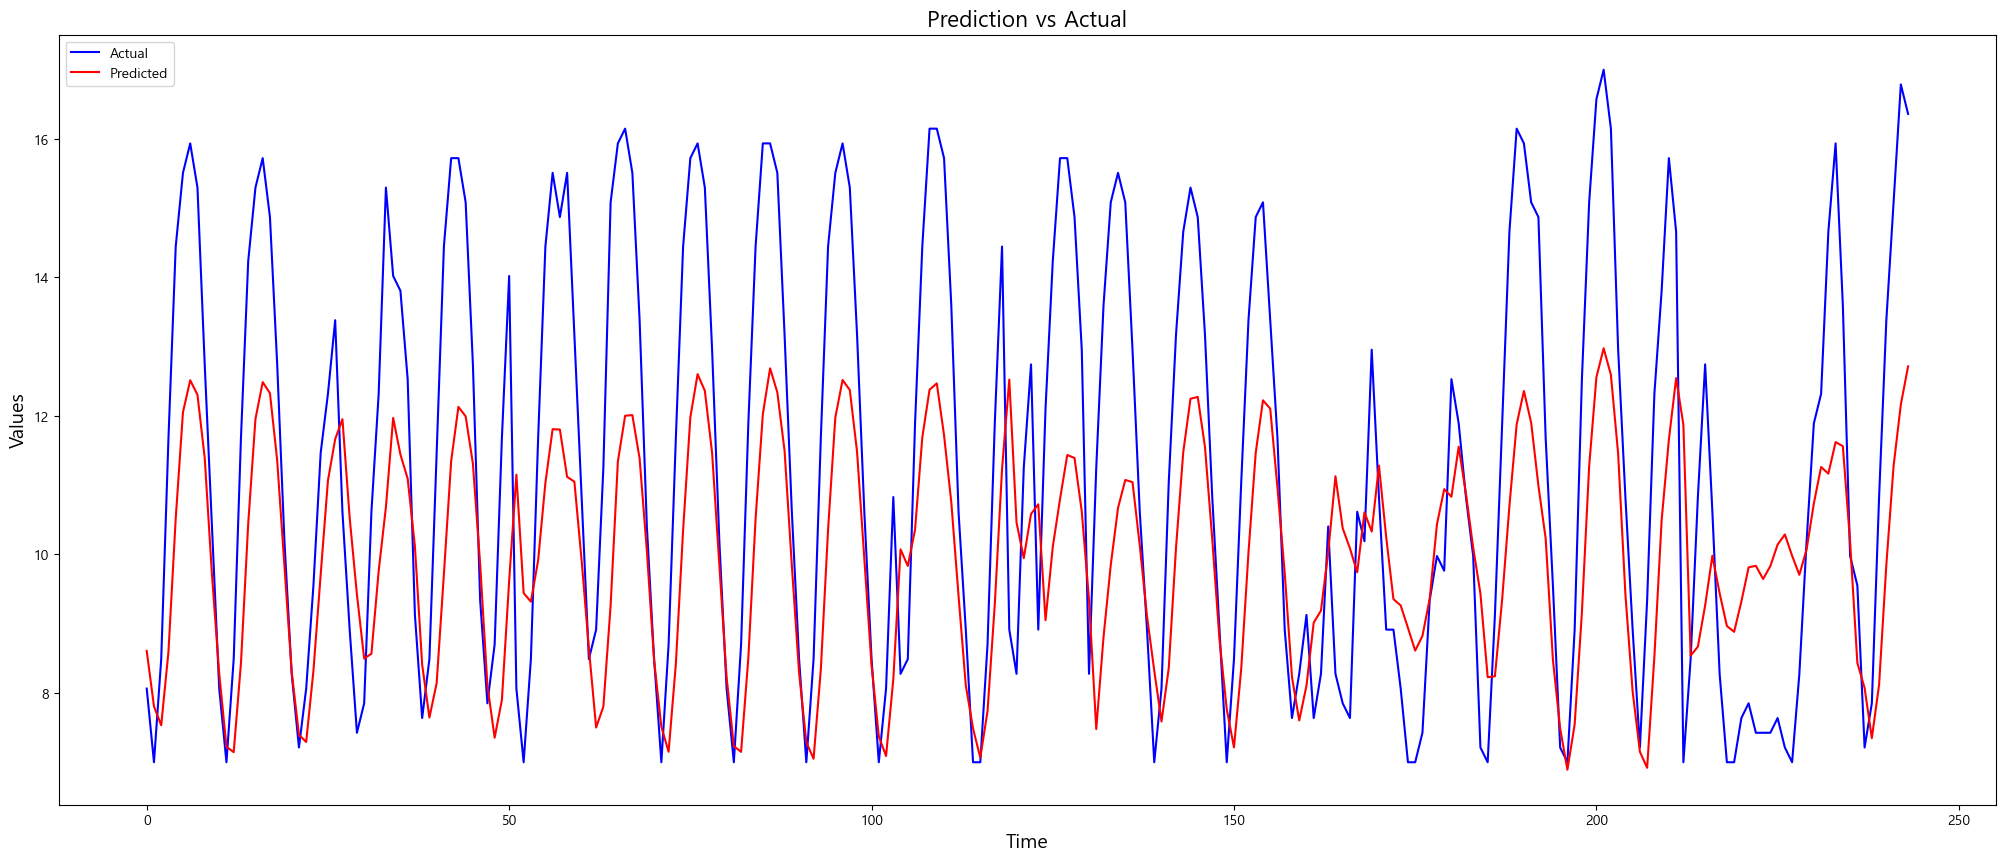

MAPE  :  17.742464259563974
R2   :  -1.4572359243495088


In [498]:
# 예측 데이터 시각화
plt.figure(figsize=(25, 10))

# Seaborn을 활용한 라인플롯
sns.lineplot(x=range(len(predict_result)), y=predict_result['GT'], label='Actual', color='blue')
sns.lineplot(x=range(len(predict_result)), y=predict_result['Pred'], label='Predicted', color='red')

# X축 눈금 설정
x_ticks = range(24, len(predict_result), 20)

# 그래프 설정
plt.title("Prediction vs Actual", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend()
plt.show()

MAPE = np.mean(np.abs((predict_result['GT'] - predict_result['Pred']) /  predict_result['GT'])) * 100
R2 = r2_score(predict_result['Pred'], predict_result['GT'])

print('MAPE  : ', MAPE)
print('R2   : ', R2)